## Analysis of the overall situation in Czech Republic and adequacy of policy respoces

In [17]:
#importing required packages 
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from bs4 import BeautifulSoup

In [4]:
import Module as m

In [5]:
start_date= '2020-03-10'
end_date= '2020-08-18'

df = m.get_stringency(start_date,end_date) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 2020-03-10 to 2020-08-18
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   confirmed               162 non-null    object
 1   deaths                  162 non-null    object
 2   stringency_actual       162 non-null    object
 3   stringency              162 non-null    object
 4   stringency_legacy       162 non-null    object
 5   stringency_legacy_disp  162 non-null    object
dtypes: object(6)
memory usage: 8.9+ KB


In [6]:
df = df.astype('float')

In [7]:
df

,confirmed,deaths,stringency_actual,stringency,stringency_legacy,stringency_legacy_disp
2020-03-10,41.0,0.0,25.00,25.00,33.57,33.57
2020-03-11,91.0,0.0,47.22,47.22,53.57,53.57
2020-03-12,94.0,0.0,50.00,50.00,53.57,53.57
2020-03-13,141.0,0.0,57.41,57.41,64.29,64.29
2020-03-14,189.0,0.0,61.11,61.11,67.86,67.86
...,...,...,...,...,...,...
2020-08-14,19693.0,394.0,36.11,36.11,50.00,50.00
2020-08-15,19891.0,395.0,36.11,36.11,50.00,50.00
2020-08-16,20012.0,397.0,36.11,36.11,50.00,50.00
2020-08-17,20202.0,399.0,36.11,36.11,50.00,50.00


In [8]:
df_stats = m.get_general_daily_stats()

In [8]:
df_stats.tail()

,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti,kumulativni_pocet_testu,kumulativni_pocet_ag_testu,prirustkovy_pocet_nakazenych,prirustkovy_pocet_vylecenych,prirustkovy_pocet_umrti,prirustkovy_pocet_provedenych_testu,prirustkovy_pocet_provedenych_ag_testu
datum,,,,,,,,,,
2021-08-27,1678734,1647090,30402,9937201,25819149,183,194,1,30851,89909
2021-08-28,1678867,1647095,30403,9955062,25857317,133,5,1,17861,38168
2021-08-29,1678948,1647101,30404,9964903,25887540,81,6,1,9841,30223
2021-08-30,1679189,1647126,30404,9993000,25939806,241,25,0,28097,52266
2021-08-31,1679476,1647148,30404,10028451,25989699,287,22,0,35451,49893


In [9]:
df_stats = df_stats.drop(['kumulativni_pocet_nakazenych', 'kumulativni_pocet_vylecenych','kumulativni_pocet_umrti', 'kumulativni_pocet_testu', 'kumulativni_pocet_ag_testu'], axis=1)

In [10]:
df= df.merge(df_stats, left_index=True, right_index=True, how='left')

In [11]:
df

,confirmed,deaths,stringency_actual,stringency,stringency_legacy,stringency_legacy_disp,prirustkovy_pocet_nakazenych,prirustkovy_pocet_vylecenych,prirustkovy_pocet_umrti,prirustkovy_pocet_provedenych_testu,prirustkovy_pocet_provedenych_ag_testu
2020-03-10,41.0,0.0,25.00,25.00,33.57,33.57,25,0,0,165,0
2020-03-11,91.0,0.0,47.22,47.22,53.57,53.57,31,0,0,458,0
2020-03-12,94.0,0.0,50.00,50.00,53.57,53.57,22,0,0,537,0
2020-03-13,141.0,0.0,57.41,57.41,64.29,64.29,25,0,0,845,0
2020-03-14,189.0,0.0,61.11,61.11,67.86,67.86,48,1,0,986,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14,19693.0,394.0,36.11,36.11,50.00,50.00,291,247,2,7999,0
2020-08-15,19891.0,395.0,36.11,36.11,50.00,50.00,197,107,2,5113,0
2020-08-16,20012.0,397.0,36.11,36.11,50.00,50.00,121,76,2,2979,0
2020-08-17,20202.0,399.0,36.11,36.11,50.00,50.00,191,281,4,7252,0


In [12]:
df_matrix = df[["stringency", "stringency_legacy", "prirustkovy_pocet_nakazenych", "prirustkovy_pocet_vylecenych", "prirustkovy_pocet_umrti"]]
df_matrix

,stringency,stringency_legacy,prirustkovy_pocet_nakazenych,prirustkovy_pocet_vylecenych,prirustkovy_pocet_umrti
2020-03-10,25.00,33.57,25,0,0
2020-03-11,47.22,53.57,31,0,0
2020-03-12,50.00,53.57,22,0,0
2020-03-13,57.41,64.29,25,0,0
2020-03-14,61.11,67.86,48,1,0
...,...,...,...,...,...
2020-08-14,36.11,50.00,291,247,2
2020-08-15,36.11,50.00,197,107,2
2020-08-16,36.11,50.00,121,76,2
2020-08-17,36.11,50.00,191,281,4


[Text(0.5, 0, 'stringency'),
 Text(1.5, 0, 'stringency_legacy'),
 Text(2.5, 0, 'prirustkovy_pocet_nakazenych'),
 Text(3.5, 0, 'prirustkovy_pocet_vylecenych'),
 Text(4.5, 0, 'prirustkovy_pocet_umrti')]

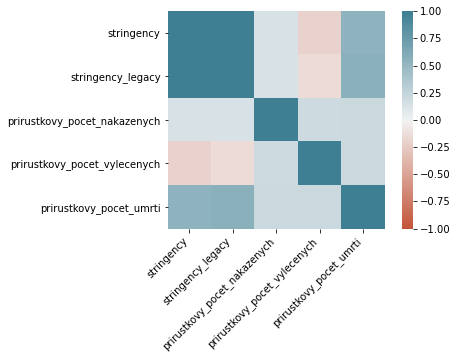

In [15]:
corr = df_matrix.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

The strongest relationship according to correlation can be observed between stringency variables and number of new deaths represented by the variable 'prirustkovy_pocet_umrti'. This can be interpreted in a way that government has reacted especially based on the actual situation (new deaths) than on the future expected development of the COVID-19 situation that can be predicted out of the number of newly infected.

([], [])

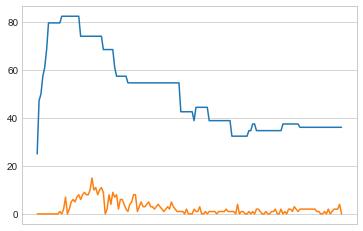

In [52]:
fig = plt.figure()
ax = plt.axes()

ax.plot(df['stringency'])
ax.plot(df['prirustkovy_pocet_umrti'])
plt.xticks([])

A closer look at the graph supports the results of the correlation matrix where the relationship between new deaths and stringency index is only around 0,5. We can see that the strictness of the government decisions does not go much in hand with the number of new deaths. 